# 🔎 Exploratory Data Analysis.

### In this Notebook we'll do some very basic EDA (Exploratory Data Analysis, to dig a bit deeper in our Data, before setting up our Database and move on.

### Importing Necessary Libraries.

In [1]:
import json
import time

import pandas as pd
import geopandas as gpd

import folium
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os
from dotenv import load_dotenv

load_dotenv("../.env")

import sys

sys.path.append("../Scripts/")
sys.path.append("../")

import paths
import config

### Let's now grab all our Raw Data Files as DFs, Add an Identifying Column to each DF with the CityID and then, concat them in a gigantic DF.

In [2]:
Cities = config.Cities

os.listdir(paths.RAW_DATA_DIR)

['Perugia_HistoricalData_01092022_29022024.parquet',
 '.ipynb_checkpoints',
 'Roma_HistoricalData_01092022_29022024.parquet',
 'Bologna_HistoricalData_01092022_29022024.parquet',
 'Trento_HistoricalData_01092022_29022024.parquet',
 'Potenza_HistoricalData_01092022_29022024.parquet',
 'Firenze_HistoricalData_01092022_29022024.parquet',
 'Ancona_HistoricalData_01092022_29022024.parquet',
 'Catanzaro_HistoricalData_01092022_29022024.parquet',
 'Cagliari_HistoricalData_01092022_29022024.parquet',
 'Venezia_HistoricalData_01092022_29022024.parquet',
 'Genova_HistoricalData_01092022_29022024.parquet',
 'Milano_HistoricalData_01092022_29022024.parquet',
 'Bari_HistoricalData_01092022_29022024.parquet',
 'Campobasso_HistoricalData_01092022_29022024.parquet',
 'Trieste_HistoricalData_01092022_29022024.parquet',
 "L'Aquila_HistoricalData_01092022_29022024.parquet",
 'Palermo_HistoricalData_01092022_29022024.parquet',
 'Torino_HistoricalData_01092022_29022024.parquet',
 'Aosta_HistoricalData_0109

In [3]:
WholeDF = pd.DataFrame()

for file in os.listdir(paths.RAW_DATA_DIR):
    if file.endswith(".parquet"):
        #Splitting the FileName for '_' character and then getting the first item in the list as it's going to be the correspective name of the city.
        CityName = file.split("_")[0]
        print(f'Fetching Raw Data from Disk in Raw Data Dir for {CityName}')
        
        #Get the City ID for given City from Cities List
        CityID = next((x["CityID"] for x in Cities if x["CityName"] == CityName), None)
        print(f'Got City ID {CityID}')
        
        TempCityDF = pd.read_parquet(paths.RAW_DATA_DIR / file)
        
        #Moving the CityID Column as First
        TempCityDF["CityID"] = CityID
        CityIDColumn = TempCityDF.pop("CityID")
        TempCityDF.insert(0, "CityID", CityIDColumn)
        
        #A Shorter Single-Liner
        #TempCityDF.insert(0, "CityID", [CityID for x in range(len(TempCityDF))])
        
        #print(TempCityDF.head())
        
        WholeDF = pd.concat([WholeDF, TempCityDF])

Fetching Raw Data from Disk in Raw Data Dir for Perugia
Got City ID PG
Fetching Raw Data from Disk in Raw Data Dir for Roma
Got City ID RM
Fetching Raw Data from Disk in Raw Data Dir for Bologna
Got City ID BO
Fetching Raw Data from Disk in Raw Data Dir for Trento
Got City ID TN
Fetching Raw Data from Disk in Raw Data Dir for Potenza
Got City ID PZ
Fetching Raw Data from Disk in Raw Data Dir for Firenze
Got City ID FI
Fetching Raw Data from Disk in Raw Data Dir for Ancona
Got City ID AN
Fetching Raw Data from Disk in Raw Data Dir for Catanzaro
Got City ID CZ
Fetching Raw Data from Disk in Raw Data Dir for Cagliari
Got City ID CA
Fetching Raw Data from Disk in Raw Data Dir for Venezia
Got City ID VE
Fetching Raw Data from Disk in Raw Data Dir for Genova
Got City ID GE
Fetching Raw Data from Disk in Raw Data Dir for Milano
Got City ID MI
Fetching Raw Data from Disk in Raw Data Dir for Bari
Got City ID BA
Fetching Raw Data from Disk in Raw Data Dir for Campobasso
Got City ID CB
Fetching R

### Next up, let's Sort our GiganticDF and then Explore our Data.

In [4]:
SortedWholeDF = WholeDF.sort_values(by = "Date_GMT+1_Europe/Berlin")

SortedWholeDF.head()

,CityID,Date_GMT+1_Europe/Berlin,Temperature_2m,Relative_Humidity_2m,Dew_Point_2m,Precipitation,Pressure_msl,Surface_Pressure,Cloud_Cover,Wind_Speed_10m,...,Wind_Wirection_10m,Wind_Direction_100m,Soil_Temperature_0-7cm,Soil_Temperature_7-28cm,Soil_Temperature_28-100cm,Soil_Temperature_100-255cm,Soil_Moisture_0-7cm,Soil_Moisture_7-28cm,Soil_Moisture_28-100cm,EuropeanAQI
0,PG,2022-09-01T00:00,18.8,84,15.9,0.0,1012.6,958.8,77,5.4,...,127,165,21.5,24.0,22.7,20.5,0.254,0.201,0.144,29
0,CZ,2022-09-01T00:00,20.7,90,18.9,0.0,1014.2,975.6,24,14.2,...,294,288,22.8,24.6,23.1,20.4,0.271,0.195,0.268,31
0,CA,2022-09-01T00:00,24.4,83,21.2,0.1,1014.7,1013.2,5,22.7,...,333,333,27.0,27.0,27.0,27.0,0.000,0.000,0.000,32
0,CB,2022-09-01T00:00,16.4,97,15.9,0.0,1013.6,934.6,77,4.9,...,234,238,19.8,22.4,21.2,19.0,0.236,0.178,0.157,28
0,PZ,2022-09-01T00:00,16.6,94,15.5,0.0,1015.0,922.5,2,6.9,...,231,241,19.2,22.0,20.9,19.0,0.212,0.175,0.148,18


### Exploratory Data Analysis is more like an Art rather than a Science.
### You simply ask yourself some questions and see if you can find something while digging a bit deeper into your Data.
### Recall the 4 Types of Analysis: Descriptive - Diagnostic - Predictive - Prescriptive

### Question 1 for EDA: For each hour of the day, which city had the highest AQIndex and which city had the highest count throughout the Data Period?

In [97]:
HighestAQIDF = SortedWholeDF.groupby("Date_GMT+1_Europe/Berlin")[["CityID", "EuropeanAQI"]].apply(lambda x: x[x['EuropeanAQI'] == x['EuropeanAQI'].max()])

HighestAQIDF.tail(40)

,,CityID,EuropeanAQI
Date_GMT+1_Europe/Berlin,,,
2024-02-28T13:00,13093,CB,48
2024-02-28T14:00,13094,CB,48
2024-02-28T15:00,13095,CB,48
2024-02-28T16:00,13096,CB,47
2024-02-28T17:00,13097,TN,47
2024-02-28T18:00,13098,TN,48
2024-02-28T19:00,13099,TN,49
2024-02-28T20:00,13100,TN,51
2024-02-28T21:00,13101,TN,54


In [99]:
TotalCount = HighestAQIDF["CityID"].value_counts()
TotalCount

CityID
MI    4144
TO    3113
VE    1646
NA    1016
CA    1002
BA     910
AO     740
CZ     605
PA     408
RM     223
AN     198
GE     183
BO      80
TS      66
AQ      61
TN      55
PZ      50
PG      46
CB      44
FI      31
Name: count, dtype: int64

[Text(0.5, 1.0, 'Counted Number of Days with Highest AQI in Italy by CityID')]

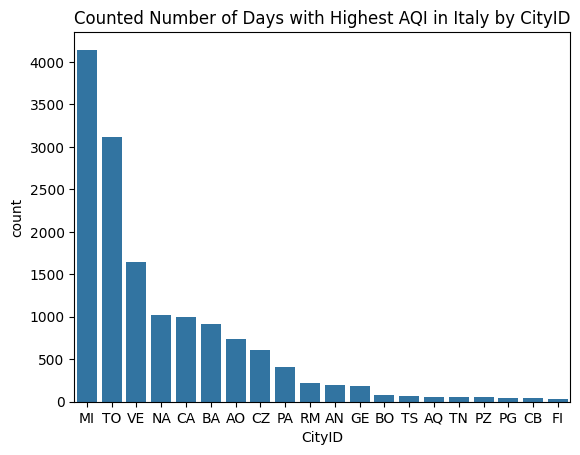

In [102]:
sns.barplot(TotalCount).set(title = "Counted Number of hours with Highest AQI in Italy by CityID")

### Question 2 for EDA: Is there any Correlation between Weather and AQI? Let's see the main Weather indicators.

In [105]:
SortedWholeDF.columns

Index(['CityID', 'Date_GMT+1_Europe/Berlin', 'Temperature_2m',
       'Relative_Humidity_2m', 'Dew_Point_2m', 'Precipitation', 'Pressure_msl',
       'Surface_Pressure', 'Cloud_Cover', 'Wind_Speed_10m', 'Wind_Speed_100m',
       'Wind_Wirection_10m', 'Wind_Direction_100m', 'Soil_Temperature_0-7cm',
       'Soil_Temperature_7-28cm', 'Soil_Temperature_28-100cm',
       'Soil_Temperature_100-255cm', 'Soil_Moisture_0-7cm',
       'Soil_Moisture_7-28cm', 'Soil_Moisture_28-100cm', 'EuropeanAQI'],
      dtype='object')

### For the cities with the Highest AQI throughout each hour of the day, let's inspect the main weather indicators.

In [126]:
WeatherGroupedDF = SortedWholeDF.groupby("Date_GMT+1_Europe/Berlin")[["CityID", "Temperature_2m", "Relative_Humidity_2m", "Cloud_Cover", "Wind_Speed_10m", "Wind_Speed_100m", "EuropeanAQI"]].apply(lambda x: x[x['EuropeanAQI'] == x['EuropeanAQI'].max()])


In [127]:
WeatherGroupedDF.head(10)

CityID  Temperature_2m  Relative_Humidity_2m  \
Date_GMT+1_Europe/Berlin                                                  
2022-09-01T00:00         0     AN            21.4                    95   
2022-09-01T01:00         1     TS            20.2                    78   
2022-09-01T02:00         2     TS            19.1                    75   
2022-09-01T03:00         3     TS            18.6                    72   
                         3     MI            20.6                    92   
2022-09-01T04:00         4     MI            20.4                    93   
2022-09-01T05:00         5     TS            18.4                    68   
                         5     MI            20.4                    92   
2022-09-01T06:00         6     AO            16.9                    73   
2022-09-01T07:00         7     AO            16.9                    74   

                            Cloud_Cover  Wind_Speed_10m  Wind_Speed_100m  \
Date_GMT+1_Europe/Berlin                                                   
2022-09-01T00:00         0           48             4.7              8.4   
2022-09-01T01:00         1           52            26.8             44.8   
2022-09-01T02:00         2           75            26.9             44.9   
2022-09-01T03:00         3           54            30.4             49.9   
                         3           90             6.4             13.4   
2022-09-01T04:00         4          100             3.4              8.4   
2022-09-01T05:00         5           50            30.2             49.5   
                         5           38             2.9              8.0   
2022-09-01T06:00         6           28             4.4              6.8   
2022-09-01T07:00         7           34             3.5              6.6   

                            EuropeanAQI  
Date_GMT+1_Europe/Berlin                 
2022-09-01T00:00         0           45  
2022-09-01T01:00         1           38  
2022-09-01T02:00         2           38  
2022-09-01T03:00         3           38  
                         3           38  
2022-09-01T04:00         4           40  
2022-09-01T05:00         5           38  
                         5           38  
2022-09-01T06:00         6           38  
2022-09-01T07:00         7           42

### Let's Build an heatmap that for every entry in our WeatherGroupedDF DataFrame (it's ok even if quite messy right now) shows the correlation between Main Weather Indicators and AQI.

<Axes: >

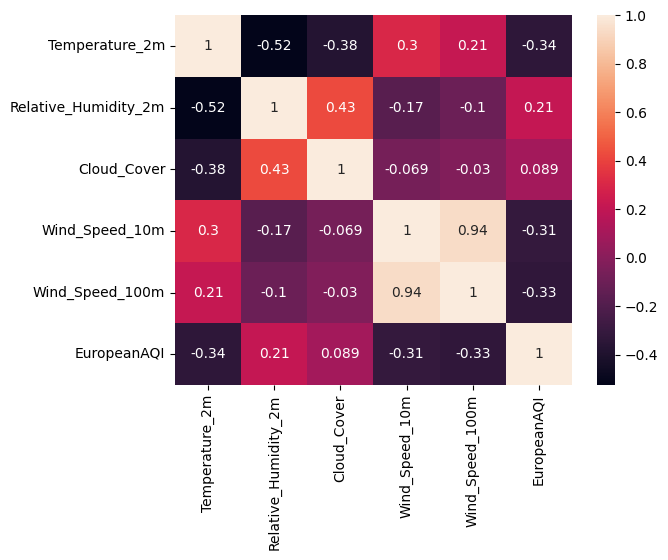

In [136]:
sns.heatmap(WeatherGroupedDF.drop(["CityID"], axis = 1, inplace = False).corr(), annot=True)

### From the above Heatmap, we can draw a Couple of conclusions:
### The European AQI is slightly correlated to the Wind Speed and the Temperature.
### Let's now have a look at a bigger spectrum of the heatmap.

<Axes: >

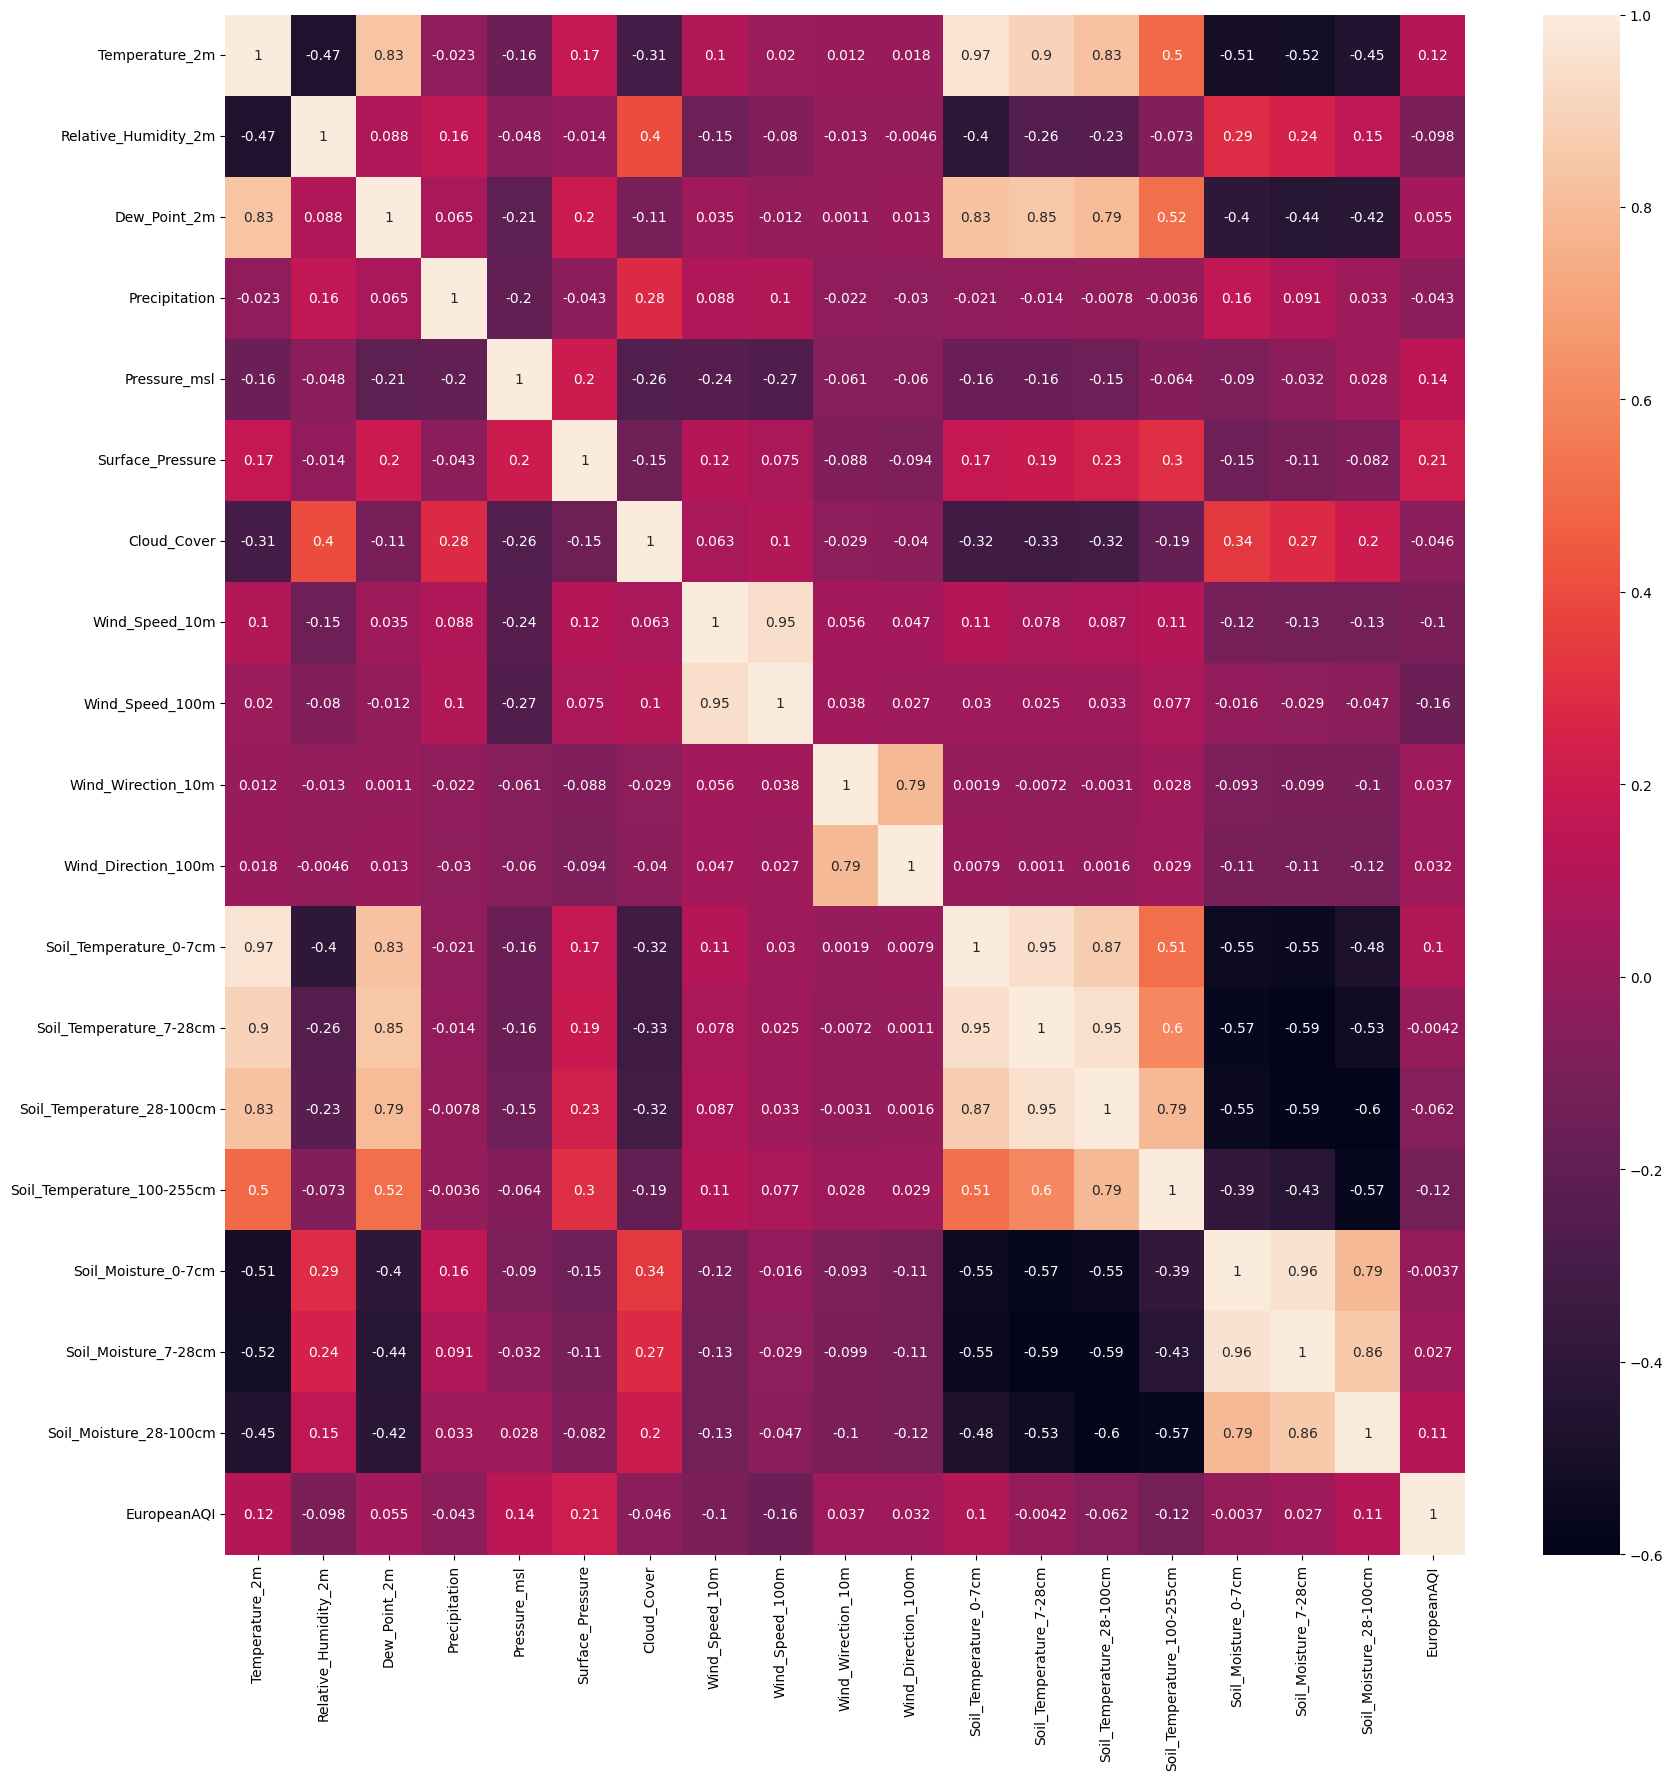

In [144]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(SortedWholeDF.drop(["CityID", "Date_GMT+1_Europe/Berlin"], axis = 1, inplace = False).corr(), annot=True)

### To draw much smarter Conclusions we would also need more Air Quality Detailed Data (Offered by OpenMeteo.com of course)
### However, as I have little Domain Knowledge of Climate and Air Conditions and since Data Analysis is out of the scope of this Project, I will stop digging Deeper into the Data.